In [252]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

# 7.7 Exercices

   ###      7.7.1 Moyenne des notes

In [253]:
lst = []
with open("notes.txt", 'r') as notes:
    for ligne in notes:
        lst.append(float(ligne))

print(sum(lst) / len(lst))
        

13.375


### 7.7.2 Admis ou recalé

In [254]:
lst = []
with open("notes.txt", 'r') as notes:
    for ligne in notes:
        lst.append(float(ligne))

with open("notes2.txt", 'w') as notes2:
    for l in lst:
        if l >= 10: result = " admis"
        else: result = " recale"
        notes2.write(f"{str(l)} {result}\n")

### 7.7.3 Spirale (exercice +++)

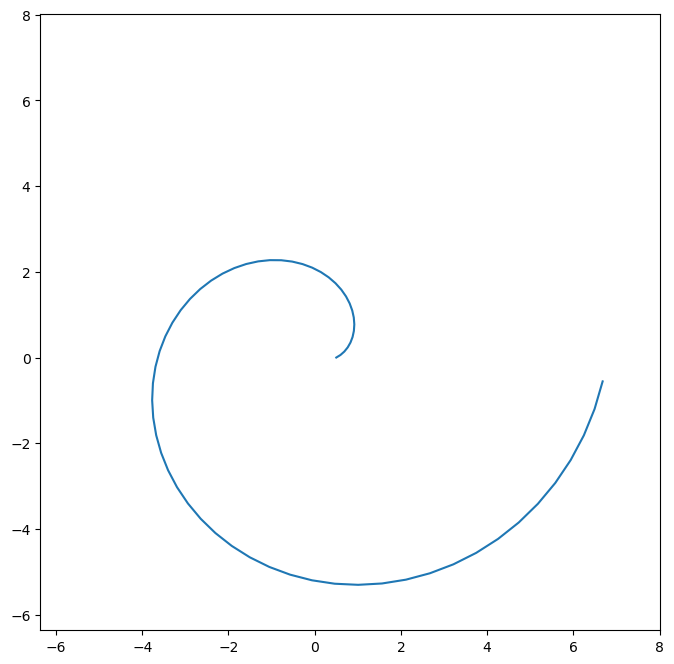

In [255]:
import math
import matplotlib.pyplot as plt

# Fonction pour calculer les coordonnées cartésiennes d'un point sur la spirale
def calculate_coordinates(angle, radius):
    x = radius * math.cos(angle)
    y = radius * math.sin(angle)
    return x, y

# Ouvrir le fichier pour le coordonnées
with open("spirale.dat", "w") as f_out:
    # Initialize radius
    radius = 0.5

    # Boucle pour deux tours de pi
    for angle in range(0, int(2 * math.pi / 0.1) + 1):
        angle_in_radians = angle * 0.1
        x, y = calculate_coordinates(angle_in_radians, radius)

        f_out.write(f"{x:10.5f} {y:10.5f}\n")
        radius += 0.1

x_values = []
y_values = []

# Lire les coordonnées du fichier
with open("spirale.dat", "r") as f_in:
    for line in f_in:
        coords = line.split()
        x_values.append(float(coords[0]))
        y_values.append(float(coords[1]))


# Tracez la spirale
plt.figure(figsize=(8, 8))
mini = min(x_values + y_values) * 1.2
maxi = max(x_values + y_values) * 1.2
plt.xlim(mini, maxi)
plt.ylim(mini, maxi)
plt.plot(x_values, y_values)

# Sauvgarde dans spirale.png
plt.savefig("spirale.png")
plt.show()

## Machine Learnia Titanic Exercices

In [256]:
data = pd.read_excel('titanic3.xls')

In [257]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [258]:
data = data.drop(['name','sibsp', 'parch','ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [259]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [260]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.965278  37.037594
       2       0.886792  27.499191
       3       0.490741  22.185307
male   1       0.340782  41.029250
       2       0.146199  30.815401
       3       0.152130  25.962273

<Axes: ylabel='Frequency'>

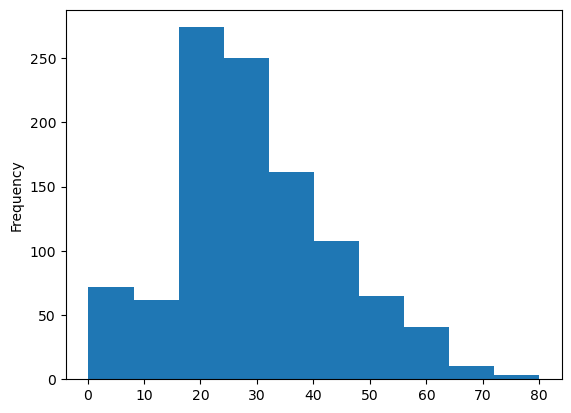

In [261]:
data['age'].plot.hist()

In [262]:
data.groupby(['sex', 'pclass']).mean()

survived        age
sex    pclass                     
female 1       0.965278  37.037594
       2       0.886792  27.499191
       3       0.490741  22.185307
male   1       0.340782  41.029250
       2       0.146199  30.815401
       3       0.152130  25.962273

### Separe les 'age' en 4 groups < 20 ans, de 20 à 30 and, de 30 à 40 ans, et plus que 40 ans

In [263]:
cat1 = data[data['age'] < 20]

cat1.head()

,pclass,survived,sex,age
1,1,1,male,0.9167
2,1,0,female,2.0000
11,1,1,female,18.0000
27,1,1,female,19.0000
53,1,0,male,17.0000


In [264]:
cat2 = data[(data['age'] >= 20) & (data['age'] < 30)]

cat2.head()

,pclass,survived,sex,age
0,1,1,female,29.0
4,1,0,female,25.0
12,1,1,female,24.0
13,1,1,female,26.0
16,1,0,male,24.0


In [265]:
cat3 = data[(data['age'] >= 30) & (data['age'] < 40)]

cat3.head()

,pclass,survived,sex,age
3,1,0,male,30.0
7,1,0,male,39.0
18,1,1,female,32.0
19,1,0,male,36.0
20,1,1,male,37.0


In [266]:
cat1 = data[data['age'] >= 40]

cat1.head()

,pclass,survived,sex,age
5,1,1,male,48.0
6,1,1,female,63.0
8,1,1,female,53.0
9,1,0,male,71.0
10,1,0,male,47.0


# Bonus exercise basé sur pandas

In [ ]:
# connection API et conversion en dataframe
url = "https://whiskyhunter.net/api/distilleries_info/"
response = requests.get(url)
json = response.json()
whiskyData = pd.DataFrame(json)

In [268]:
whiskyData.shape

(304, 6)

In [269]:
whiskyData.head()

,name,slug,country,whiskybase_whiskies,whiskybase_votes,whiskybase_rating
0,8 Doors Distillery,8_doors,Scotland,5,5,86.5
1,Abbeyhill Distillery,abbeyhill,Scotland,0,0,0.0
2,Aberargie Distillery,aberargie,Scotland,1,0,0.0
3,Aberfeldy,aberfeldy,Scotland,507,8681,84.2
4,Aberlour,aberlour,Scotland,1326,30063,85.02


In [270]:
#supprimer les données dont nous ne voulons pas
whiskyData = whiskyData.drop(['slug', 'whiskybase_whiskies', 'whiskybase_votes' ], axis=1)

In [271]:
whiskyData.head()

,name,country,whiskybase_rating
0,8 Doors Distillery,Scotland,86.5
1,Abbeyhill Distillery,Scotland,0.0
2,Aberargie Distillery,Scotland,0.0
3,Aberfeldy,Scotland,84.2
4,Aberlour,Scotland,85.02


In [272]:
whiskyData.describe()

,name,country,whiskybase_rating
count,304,304,304
unique,304,3,201
top,8 Doors Distillery,Scotland,0.0
freq,1,247,65


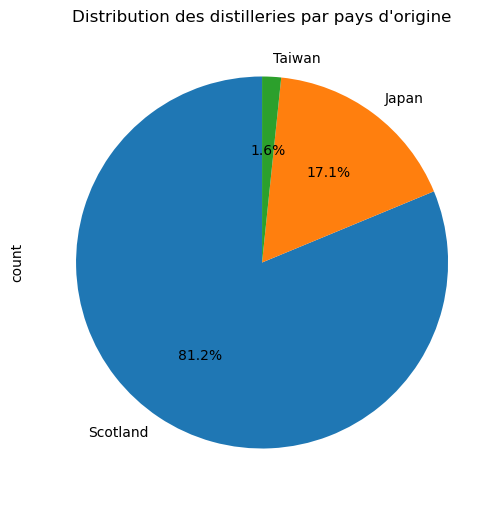

In [273]:

# Tracer un diagramme du pays d'origine avec pourcentage
fig, ax = plt.subplots(figsize=(6, 8))
# Utiliser le paramètre autopct pour afficher les pourcentages
whiskyData['country'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)

plt.title('Distribution des distilleries par pays d\'origine')
plt.show()

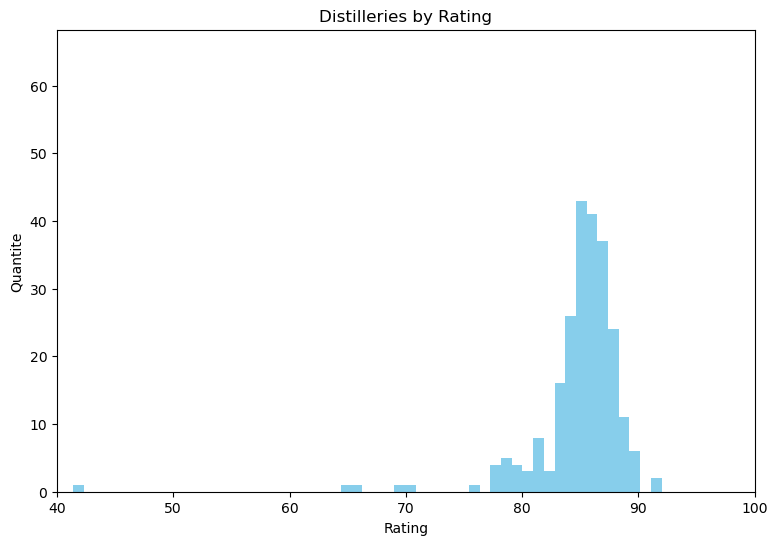

In [274]:
#tracer un diagramme des ratings des whiskys
whiskyData = whiskyData[whiskyData['whiskybase_rating'] != 0.0]
whiskyData['whiskybase_rating'] = pd.to_numeric(whiskyData['whiskybase_rating'], errors='coerce')
whisky_rating = whiskyData.sort_values(by='whiskybase_rating', ascending=False)

# Tracer un diagramme à barres horizontales pour les dix meilleures notes
fig, ax = plt.subplots(figsize=(9, 6))

whisky_rating.plot(kind='hist', y='whiskybase_rating', x='name', bins=100, color='skyblue', legend=False, ax=ax)

plt.xlim(40, 100)
plt.ylabel('Quantite')
plt.xlabel('Rating')
plt.title('Distilleries by Rating')

# Afficher le diagramme
plt.show()

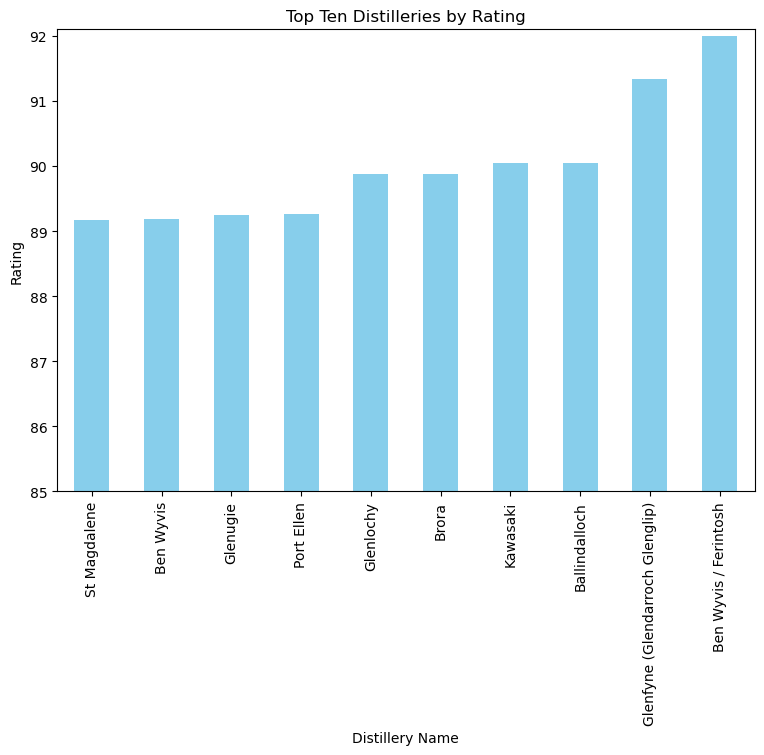

In [277]:
# prend les dix whiskys avec le meilleur rating
top_ten_ratings = whiskyData.sort_values(by='whiskybase_rating', ascending=True).tail(10)

# Tracer un diagramme à barres horizontales pour les dix meilleures notes
fig, ax = plt.subplots(figsize=(9, 6))
top_ten_ratings.plot(kind='bar', y='whiskybase_rating', x='name', color='skyblue', legend=False, ax=ax)

# Ajouter des étiquettes et un titre
plt.ylabel('Rating')
plt.xlabel('Distillery Name')
plt.title('Top Ten Distilleries by Rating')

plt.ylim(85, max(top_ten_ratings['whiskybase_rating']) + 0.1)
# Afficher le diagramme
plt.show()


In [ ]:
# les transcrie dans un fichier
top_ten_ratings.to_json('topTen.json')

In [ ]:
# le transcrie dans un CSV aussi

top_ten_ratings.to_csv ('topTen.csv', index = None)